## Analyse de l'accuracy des différentes combinaisons de modèles et pre-processings

### I. Import  des modules

In [1]:
from pathlib import Path

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

### II. Analyse des résultats inclus dans le rapport de modélisation

#### 1. Chargement des résultats des différents modèles dans un DataFrame

In [146]:
def create_dataframe(filename,model_name,data_augmentation,segmentation):
    df = pd.read_csv(filename,index_col=0)
    df = df.reset_index(names="Dataset")
    df = df.drop("loss",axis=1)
    df = df.rename({'accuracy':'Accuracy'},axis=1)
    df["Model"] = model_name
    df["Data augmentation"] = data_augmentation
    df["Segmentation"] = segmentation
    return df
    
models_list = [
    ["lenet_strongaugm_nosegmentation_results.csv","LeNet","Augmentation forte","Sans segmentation"],
    ["lenet_lowaugm_segmentation_results.csv","LeNet","Augmentation faible","Avec segmentation"],
    ["vgg19_unfreezed_strongaugm_nosegmentation_results.csv","VGG19-Unfreezed","Augmentation forte","Sans segmentation"],
    ["resnet50_freezed_strongaugm_nosegmentation_results.csv","ResNet50-Freezed","Augmentation forte","Sans segmentation"],
    ["resnet50_freezed_lowaugm_nosegmentation_results.csv","ResNet50-Freezed","Augmentation faible","Sans segmentation"],
    ["resnet50_freezed_lowaugm_segmentation_results.csv","ResNet50-Freezed","Augmentation faible","Avec segmentation"],
    ["resnet50_unfreezed_lowaugm_segmentation_results.csv","ResNet50-Unfreezed","Augmentation faible","Avec segmentation"],
    ["mobilenetV2_freezed_strongaugm_nosegmentation_results.csv","MobileNetV2-Freezed","Augmentation forte","Sans segmentation"],
    ["mobilenetV2_freezed_lowaugm_nosegmentation_results.csv","MobileNetV2-Freezed","Augmentation faible","Sans segmentation"],
    ["mobilenetV2_freezed_lowaugm_segmentation_results.csv","MobileNetV2-Freezed","Augmentation faible","Avec segmentation"],
    ["mobilenetV2_unfreezed_strongaugm_nosegmentation_results.csv","MobileNetV2-Unfreezed","Augmentation forte","Sans segmentation"],
    ["mobilenetV2_unfreezed_lowgaugm_segmentation_results.csv","MobileNetV2-Unfreezed","Augmentation faible","Avec segmentation"]
            ]

# Initialisation du DataFrame contenant les résultats des différents modèles
results = pd.DataFrame(columns = ["Dataset","Accuracy","Model","Data augmentation","Segmentation"])

for m in models_list:
    df = create_dataframe(*m)
    results = pd.concat(objs=[results,df],axis=0,ignore_index=True)

In [147]:
results = results[["Model","Data augmentation","Segmentation","Dataset","Accuracy"]]
results

,Model,Data augmentation,Segmentation,Dataset,Accuracy
0,LeNet,Augmentation forte,Sans segmentation,train,0.816079
1,LeNet,Augmentation forte,Sans segmentation,validation,0.820542
2,LeNet,Augmentation forte,Sans segmentation,test,0.813177
3,LeNet,Augmentation faible,Avec segmentation,train,0.940762
4,LeNet,Augmentation faible,Avec segmentation,validation,0.892777
5,LeNet,Augmentation faible,Avec segmentation,test,0.897112
6,VGG19-Unfreezed,Augmentation forte,Sans segmentation,train,0.954600
7,VGG19-Unfreezed,Augmentation forte,Sans segmentation,validation,0.950300
8,VGG19-Unfreezed,Augmentation forte,Sans segmentation,test,0.948900
9,ResNet50-Freezed,Augmentation forte,Sans segmentation,train,0.782800


#### 2. Performance des premiers modèles implémentés

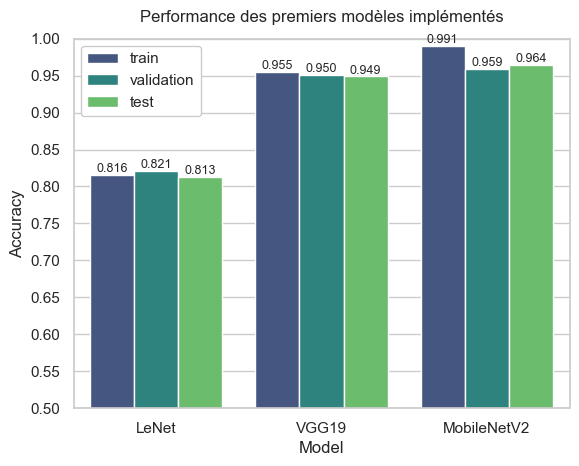

In [109]:
df = results[(results["Model"].isin(values=["LeNet","VGG19-Unfreezed","MobileNetV2-Unfreezed"])) & \
             (results["Data augmentation"]=="Augmentation forte") & \
             (results["Segmentation"]=="Sans segmentation")]
ax = sns.barplot(data=df,x='Model',y='Accuracy',hue='Dataset',palette="viridis")
plt.legend(loc='upper left',framealpha=1.)
plt.xticks(range(3),["LeNet","VGG19","MobileNetV2"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Performance des premiers modèles implémentés",fontsize=12,pad=12);

#### 3. Evaluation de l'impact de l'atténuation de l'augmentation de données

In [110]:
df = results[(results["Model"].isin(values=["ResNet50-Freezed","MobileNetV2-Freezed"])) & \
             (results["Segmentation"]=="Sans segmentation")]

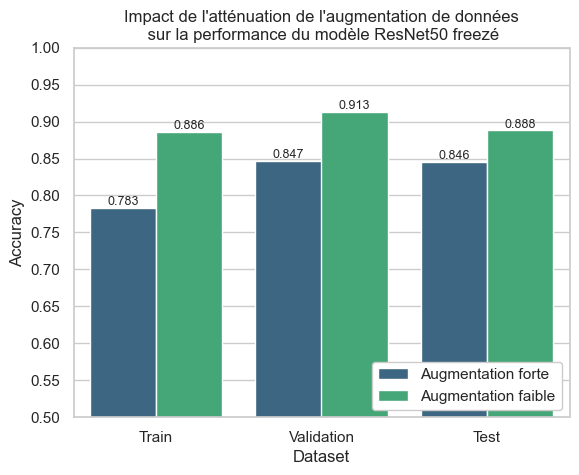

In [112]:
# Modèle ResNet50 freezé

ax = sns.barplot(data=df[df.Model=="ResNet50-Freezed"],x='Dataset',y='Accuracy',hue='Data augmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de l'atténuation de l'augmentation de données\n sur la performance du modèle ResNet50 freezé",fontsize=12);

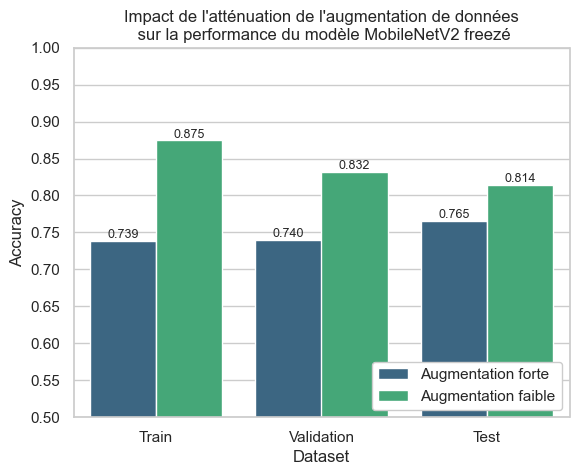

In [113]:
# Modèle MobileNetV2 freezé

ax = sns.barplot(data=df[df.Model=="MobileNetV2-Freezed"],x='Dataset',y='Accuracy',hue='Data augmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de l'atténuation de l'augmentation de données\n sur la performance du modèle MobileNetV2 freezé",fontsize=12);

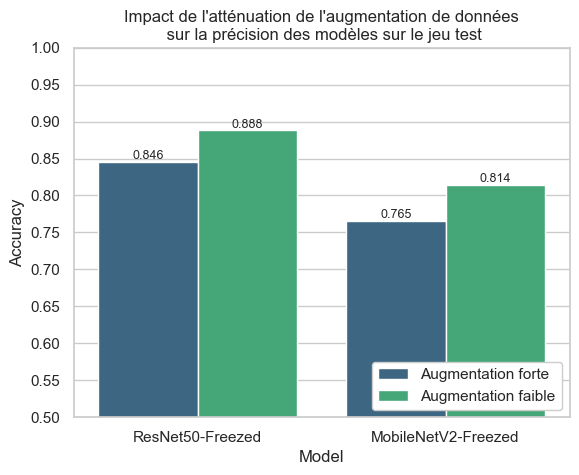

In [114]:
# Impact sur le jeu test pour les deux modèles

ax = sns.barplot(data=df[df.Dataset=="test"],x='Model',y='Accuracy',hue='Data augmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de l'atténuation de l'augmentation de données\n sur la précision des modèles sur le jeu test",fontsize=12);

#### 4. Evaluation de l'impact de la segmentation des images

In [115]:
df = results[(results["Model"].isin(values=["ResNet50-Freezed","MobileNetV2-Freezed"])) & \
             (results["Data augmentation"]=="Augmentation faible")]

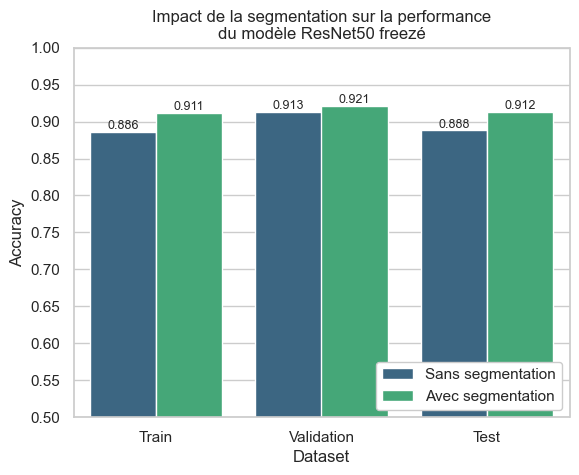

In [116]:
# Modèle ResNet50 freezé

ax = sns.barplot(data=df[df.Model=="ResNet50-Freezed"],x='Dataset',y='Accuracy',hue='Segmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de la segmentation sur la performance\ndu modèle ResNet50 freezé",fontsize=12);

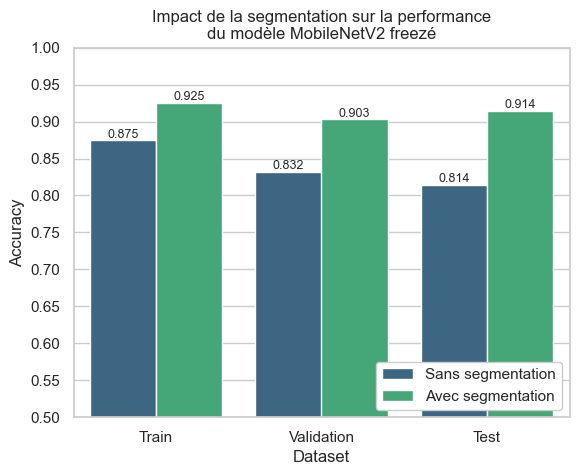

In [117]:
# Modèle MobileNetV2 freezé

ax = sns.barplot(data=df[df.Model=="MobileNetV2-Freezed"],x='Dataset',y='Accuracy',hue='Segmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de la segmentation sur la performance\ndu modèle MobileNetV2 freezé",fontsize=12);

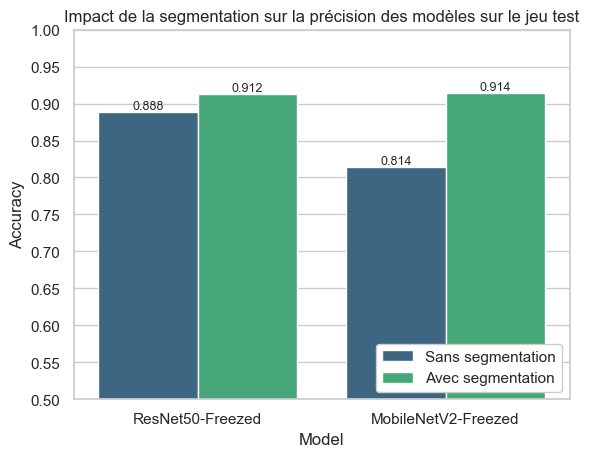

In [118]:
# Impact sur le jeu test pour les deux modèles

ax = sns.barplot(data=df[df.Dataset=="test"],x='Model',y='Accuracy',hue='Segmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de la segmentation sur la précision des modèles sur le jeu test",fontsize=12);

#### 5. Evaluation de l'impact global (augmentation faible + segmentation)

In [119]:
df = results[(results["Model"].isin(values=["LeNet","ResNet50-Freezed","MobileNetV2-Freezed","MobileNetV2-Unfreezed"])) & \
             (((results["Data augmentation"]=="Augmentation forte")&(results["Segmentation"]=="Sans segmentation")) | \
             ((results["Data augmentation"]=="Augmentation faible")&(results["Segmentation"]=="Avec segmentation")))]

In [120]:
model_evolution = df["Segmentation"].map({"Sans segmentation":"Initial model","Avec segmentation":"Improved model"})
df.insert(3,'Model evolution',model_evolution)

In [122]:
df.head()

,Model,Data augmentation,Segmentation,Model evolution,Dataset,Accuracy
0,LeNet,Augmentation forte,Sans segmentation,Initial model,train,0.816079
1,LeNet,Augmentation forte,Sans segmentation,Initial model,validation,0.820542
2,LeNet,Augmentation forte,Sans segmentation,Initial model,test,0.813177
3,LeNet,Augmentation faible,Avec segmentation,Improved model,train,0.940762
4,LeNet,Augmentation faible,Avec segmentation,Improved model,validation,0.892777


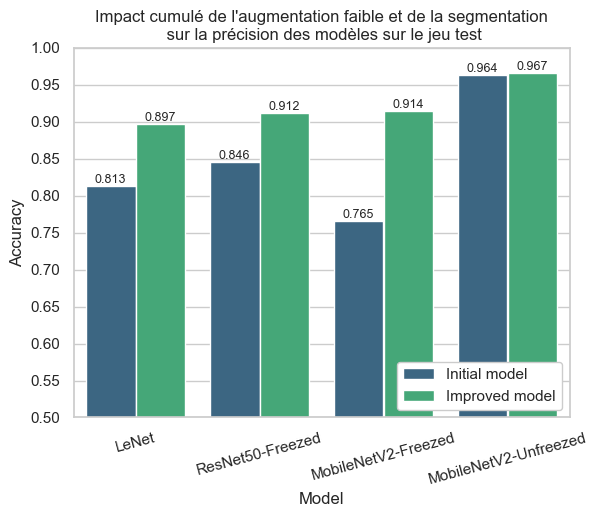

In [123]:
# Impact sur le jeu test pour les différents modèles

ax = sns.barplot(data=df[df.Dataset=="test"],x='Model',y='Accuracy',hue='Model evolution',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(rotation=15)
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact cumulé de l'augmentation faible et de la segmentation\n sur la précision des modèles sur le jeu test",fontsize=12);

#### 6. Comparaison des modèles optimisés: LeNet, ResNet50 (unfreezed), MobileNetV2 (unfreezed) avec augmentation faible et segmentation

In [124]:
df = results[(results["Model"].isin(values=["LeNet","ResNet50-Unfreezed","MobileNetV2-Unfreezed"])) & \
             (results["Data augmentation"]=="Augmentation faible") & \
             (results["Segmentation"]=="Avec segmentation")]

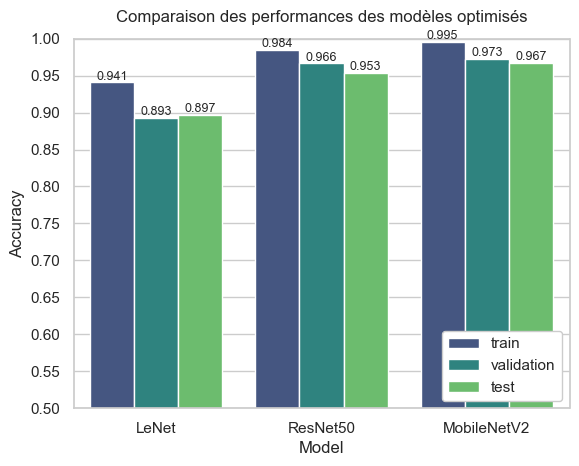

In [127]:
ax = sns.barplot(data=df,x='Model',y='Accuracy',hue='Dataset',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["LeNet","ResNet50","MobileNetV2"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Comparaison des performances des modèles optimisés",fontsize=12,pad=12);

### III. Analyse des résultats complémentaires (incluant le modèle ResNet50 de-freezé)

#### 1. Chargement des résultats complémentaires dans le DataFrame des résultats

In [148]:
new_models_list = [
    ["resnet50_unfreezed_strongaugm_nosegmentation_results.csv","ResNet50-Unfreezed","Augmentation forte","Sans segmentation"],
    ["resnet50_unfreezed_lowaugm_nosegmentation_results.csv","ResNet50-Unfreezed","Augmentation faible","Sans segmentation"],
    ["mobilenetV2_unfreezed_lowaugm_nosegmentation_results.csv","MobileNetV2-Unfreezed","Augmentation faible","Sans segmentation"]
            ]

for m in new_models_list:
    df = create_dataframe(*m)
    results = pd.concat(objs=[results,df],axis=0,ignore_index=True)

In [149]:
results.tail(20)

,Model,Data augmentation,Segmentation,Dataset,Accuracy
25,MobileNetV2-Freezed,Augmentation faible,Sans segmentation,validation,0.831800
26,MobileNetV2-Freezed,Augmentation faible,Sans segmentation,test,0.814100
27,MobileNetV2-Freezed,Augmentation faible,Avec segmentation,train,0.925200
28,MobileNetV2-Freezed,Augmentation faible,Avec segmentation,validation,0.902900
29,MobileNetV2-Freezed,Augmentation faible,Avec segmentation,test,0.914300
30,MobileNetV2-Unfreezed,Augmentation forte,Sans segmentation,train,0.990691
31,MobileNetV2-Unfreezed,Augmentation forte,Sans segmentation,validation,0.959368
32,MobileNetV2-Unfreezed,Augmentation forte,Sans segmentation,test,0.963899
33,MobileNetV2-Unfreezed,Augmentation faible,Avec segmentation,train,0.995487
34,MobileNetV2-Unfreezed,Augmentation faible,Avec segmentation,validation,0.972912


#### 2. Evaluation de l'impact de l'atténuation de l'augmentation de données

In [154]:
df1 = results[(results["Model"].isin(values=["ResNet50-Freezed","MobileNetV2-Freezed"])) & \
              (results["Segmentation"]=="Sans segmentation")].sort_values(by="Model",ascending=False)
df2 = results[(results["Model"].isin(values=["ResNet50-Unfreezed","MobileNetV2-Unfreezed"])) & \
              (results["Segmentation"]=="Sans segmentation")].sort_values(by="Model",ascending=False)
df = pd.concat(objs=[df1,df2])

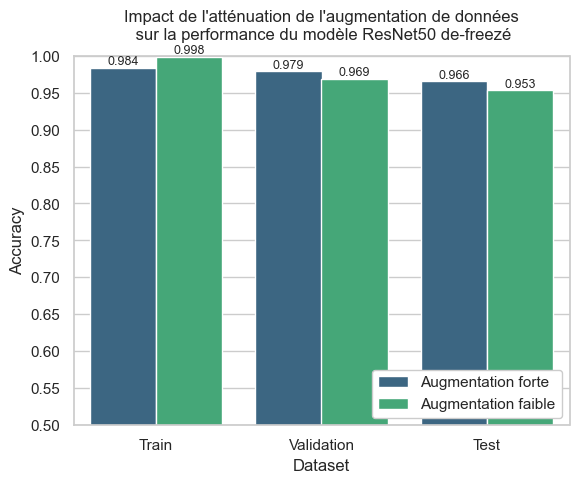

In [156]:
# Modèle ResNet50 de-freezé

ax = sns.barplot(data=df[df.Model=="ResNet50-Unfreezed"],x='Dataset',y='Accuracy',hue='Data augmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de l'atténuation de l'augmentation de données\n sur la performance du modèle ResNet50 de-freezé",fontsize=12,pad=12);

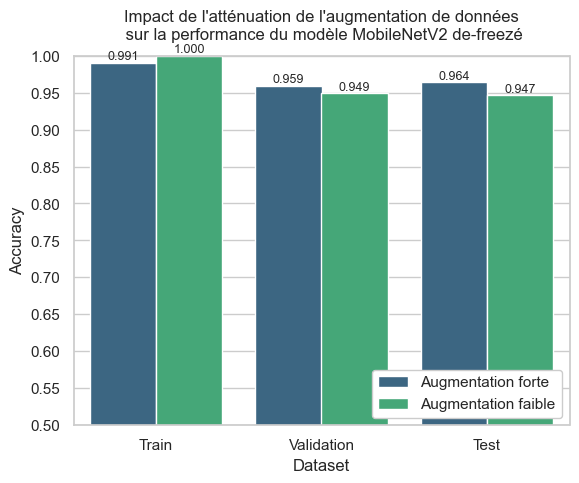

In [157]:
# Modèle MobileNetV2 de-freezé

ax = sns.barplot(data=df[df.Model=="MobileNetV2-Unfreezed"],x='Dataset',y='Accuracy',hue='Data augmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de l'atténuation de l'augmentation de données\n sur la performance du modèle MobileNetV2 de-freezé",fontsize=12,pad=12);

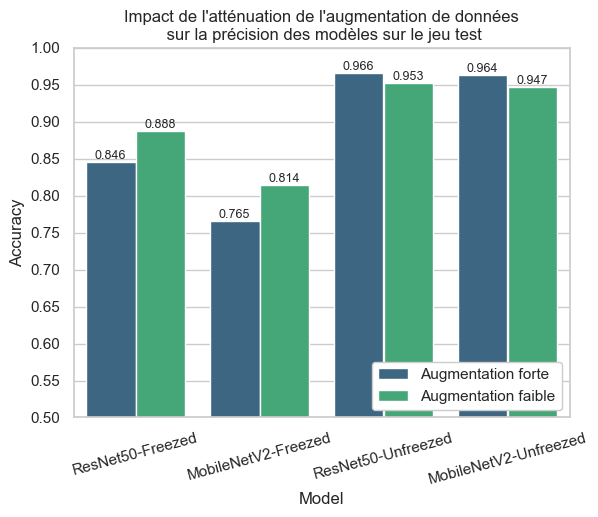

In [158]:
# Impact sur le jeu test pour les deux modèles (freezés et de-freezés)

ax = sns.barplot(data=df[df.Dataset=="test"],x='Model',y='Accuracy',hue='Data augmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(rotation=15)
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de l'atténuation de l'augmentation de données\n sur la précision des modèles sur le jeu test",fontsize=12);

#### 3. Evaluation de l'impact de la segmentation des images

In [163]:
df1 = results[(results["Model"].isin(values=["ResNet50-Freezed","MobileNetV2-Freezed"])) & \
              (results["Data augmentation"]=="Augmentation faible")].sort_values(by=["Model","Segmentation"],ascending=False)
df2 = results[(results["Model"].isin(values=["ResNet50-Unfreezed","MobileNetV2-Unfreezed"])) & \
              (results["Data augmentation"]=="Augmentation faible")].sort_values(by=["Model","Segmentation"],ascending=False)
df = pd.concat(objs=[df1,df2])

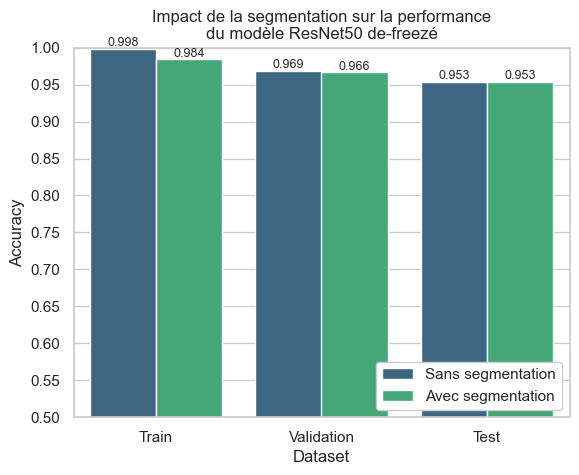

In [165]:
# Modèle ResNet50 de-freezé

ax = sns.barplot(data=df[df.Model=="ResNet50-Unfreezed"],x='Dataset',y='Accuracy',hue='Segmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de la segmentation sur la performance\ndu modèle ResNet50 de-freezé",fontsize=12);

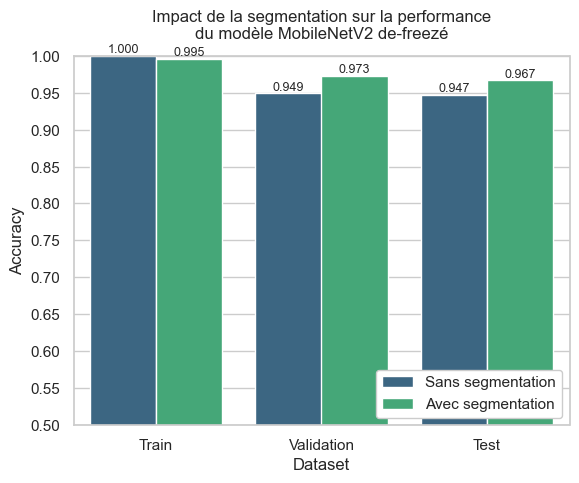

In [166]:
# Modèle MobileNetV2 de-freezé

ax = sns.barplot(data=df[df.Model=="MobileNetV2-Unfreezed"],x='Dataset',y='Accuracy',hue='Segmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de la segmentation sur la performance\ndu modèle MobileNetV2 de-freezé",fontsize=12,pad=12);

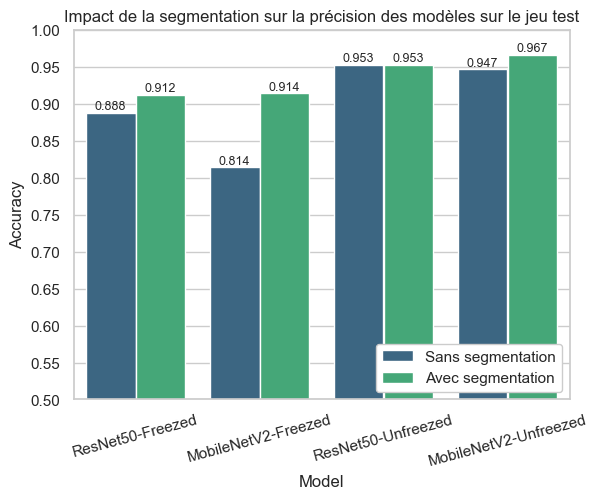

In [167]:
# Impact sur le jeu test pour les deux modèles (freezés et de-freezés)

ax = sns.barplot(data=df[df.Dataset=="test"],x='Model',y='Accuracy',hue='Segmentation',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(rotation=15)
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact de la segmentation sur la précision des modèles sur le jeu test",fontsize=12);

#### 4. Evaluation de l'impact global (augmentation faible + segmentation)

In [184]:
df1 = results[results["Model"]=="LeNet"].sort_values(by="Segmentation",ascending=False)
df2 = results[(results["Model"].isin(values=["ResNet50-Freezed","MobileNetV2-Freezed"])) & \
             (((results["Data augmentation"]=="Augmentation forte")&(results["Segmentation"]=="Sans segmentation")) | \
             ((results["Data augmentation"]=="Augmentation faible")&(results["Segmentation"]=="Avec segmentation")))]
df2 = df2.sort_values(by=["Model","Segmentation"],ascending=False)
df3 = results[(results["Model"].isin(values=["ResNet50-Unfreezed","MobileNetV2-Unfreezed"])) & \
             (((results["Data augmentation"]=="Augmentation forte")&(results["Segmentation"]=="Sans segmentation")) | \
             ((results["Data augmentation"]=="Augmentation faible")&(results["Segmentation"]=="Avec segmentation")))]
df3 = df3.sort_values(by=["Model","Segmentation"],ascending=False)
df = pd.concat(objs=[df1,df2,df3])

In [185]:
model_evolution = df["Segmentation"].map({"Sans segmentation":"Initial model","Avec segmentation":"Improved model"})
df.insert(3,'Model evolution',model_evolution)

In [186]:
df.head()

,Model,Data augmentation,Segmentation,Model evolution,Dataset,Accuracy
0,LeNet,Augmentation forte,Sans segmentation,Initial model,train,0.816079
1,LeNet,Augmentation forte,Sans segmentation,Initial model,validation,0.820542
2,LeNet,Augmentation forte,Sans segmentation,Initial model,test,0.813177
3,LeNet,Augmentation faible,Avec segmentation,Improved model,train,0.940762
4,LeNet,Augmentation faible,Avec segmentation,Improved model,validation,0.892777


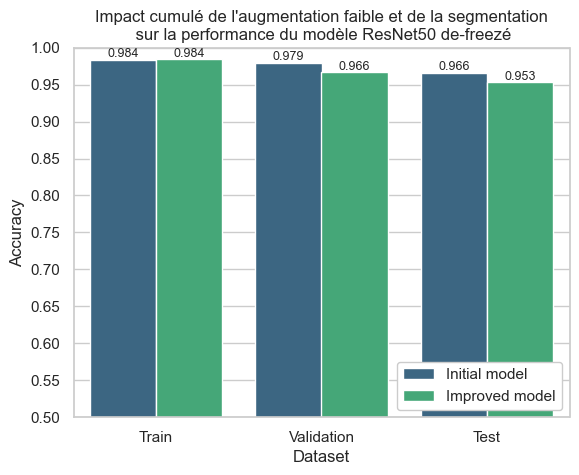

In [187]:
# Modèle ResNet50 de-freezé

ax = sns.barplot(data=df[df.Model=="ResNet50-Unfreezed"],x='Dataset',y='Accuracy',hue='Model evolution',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact cumulé de l'augmentation faible et de la segmentation\n sur la performance du modèle ResNet50 de-freezé",fontsize=12);

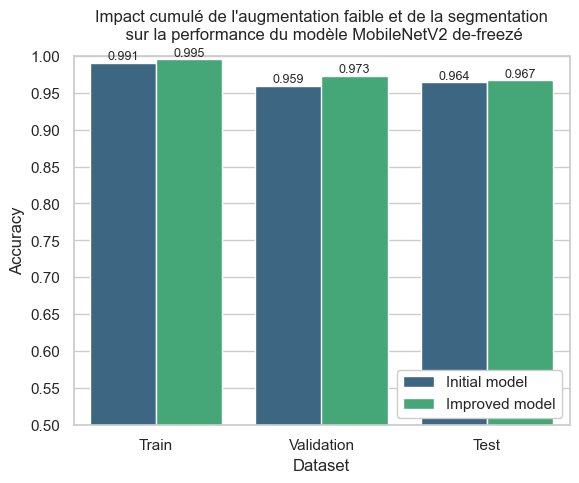

In [190]:
# Modèle MobileNetV2 de-freezé

ax = sns.barplot(data=df[df.Model=="MobileNetV2-Unfreezed"],x='Dataset',y='Accuracy',hue='Model evolution',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.xticks(range(3),["Train","Validation","Test"])
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact cumulé de l'augmentation faible et de la segmentation\n sur la performance du modèle MobileNetV2 de-freezé",fontsize=12,pad=12);

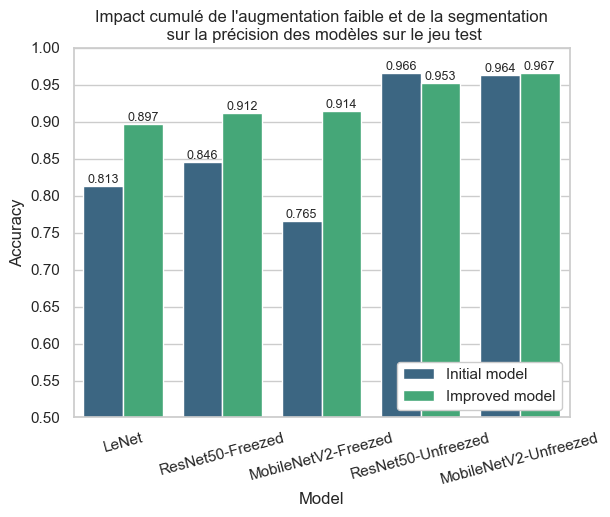

In [188]:
# Impact sur le jeu test pour les différents modèles

ax = sns.barplot(data=df[df.Dataset=="test"],x='Model',y='Accuracy',hue='Model evolution',palette="viridis")
plt.legend(loc='lower right',framealpha=1.)
plt.ylim(0.5,1)
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(rotation=15)
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.3f',fontsize=9)
plt.title("Impact cumulé de l'augmentation faible et de la segmentation\n sur la précision des modèles sur le jeu test",fontsize=12);